# Social Media Addiction Classification Using Machine Learning
## Problem Statement

With the rapid growth of social media platforms, excessive usage has begun to impact mental health, sleep quality, focus, and overall productivity.
The objective of this project is to classify whether an individual is addicted to social media based on behavioral and lifestyle factors such as daily screen time, social media usage duration, sleep hours, anxiety level, and productivity.

This classification can help identify unhealthy usage patterns early and support preventive actions for better digital well-being.

## Type of Problem

- **Machine Learning Type:** Supervised Learning

- **Problem Category:** Binary Classification

- **Target Variable:** Social Media Addiction Status

 - 1 → Addicted

 - 0 → Not Addicted

## Why This Problem Matters

- Excessive social media usage is linked to anxiety, poor sleep, and reduced productivity

- Early identification of addiction can support mental health interventions

- Useful for digital wellness platforms and awareness programs

- Demonstrates how machine learning can be applied to behavioral and lifestyle data

## Who Can Use This Model?

- Mental health and wellness applications

- Educational institutions and researchers

- Digital well-being and productivity platforms

- Individuals interested in understanding their usage patterns

## Dataset Description

The dataset consists of survey-based data on social media usage behavior.
It includes demographic and lifestyle attributes such as age, gender, screen time, sleep duration, anxiety levels, and productivity indicators.

The dataset originally contains a numerical Addicted_Score, which represents the severity of social media addiction.
To frame the problem as a classification task, this score is transformed into categorical labels indicating addiction status.

## Target Variable Construction

- Individuals with an addiction score greater than or equal to a defined threshold are labeled as Addicted

- Individuals with a score below the threshold are labeled as Not Addicted

This transformation enables supervised binary classification modeling.

## Expected Outcome

- Classify individuals as Addicted or Not Addicted to social media

- Understand which behavioral factors contribute most to addiction

- Provide insights into how screen time, sleep, and anxiety influence addiction risk

## STANDARD IMPORTS

In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot visuals
sns.set(style="whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

### Data Loading and Inspection

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Students Social Media Addiction.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.shape

(705, 13)

In [5]:
df.size

9165

In [6]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [7]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [8]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

#### Data Overview

The dataset consists of survey-based records representing individuals’ social media usage and lifestyle habits.
Each row corresponds to one individual, and the dataset contains multiple numerical and categorical features relevant to social media addiction.

In [10]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

### Target Variable Analysis

In [11]:
df['Addicted'] = df['Addicted_Score'].apply(lambda x: 1 if x >= 6 else 0)


In [12]:
df['Addicted'].value_counts()
df[['Addicted_Score', 'Addicted']].head(10)

,Addicted_Score,Addicted
0,8,1
1,3,0
2,9,1
3,4,0
4,7,1
5,9,1
6,2,0
7,8,1
8,5,0
9,4,0


The dataset provides a numerical addiction score indicating the severity of social media usage.
To frame the problem as a binary classification task, the addiction score was converted into categorical labels.
Individuals with scores greater than or equal to a defined threshold were labeled as “Addicted”, while others were labeled as “Not Addicted”.

In [13]:
df['Addicted'].value_counts()

Addicted
1    469
0    236
Name: count, dtype: int64

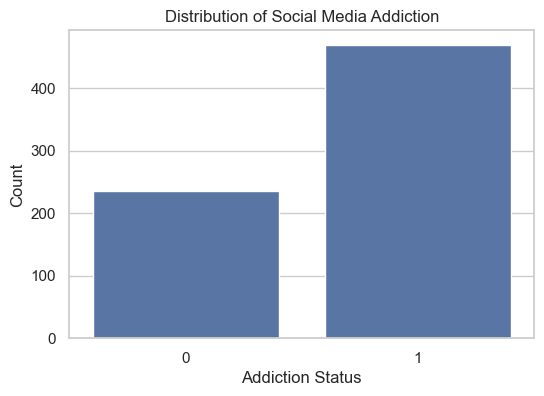

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Addicted', data=df)
plt.title("Distribution of Social Media Addiction")
plt.xlabel("Addiction Status")
plt.ylabel("Count")
plt.show()

The bar plot illustrates the distribution of addicted and non-addicted individuals.
A reasonably balanced distribution indicates that the dataset is suitable for binary classification.

### Bivariate Analysis (Features vs Addicted)

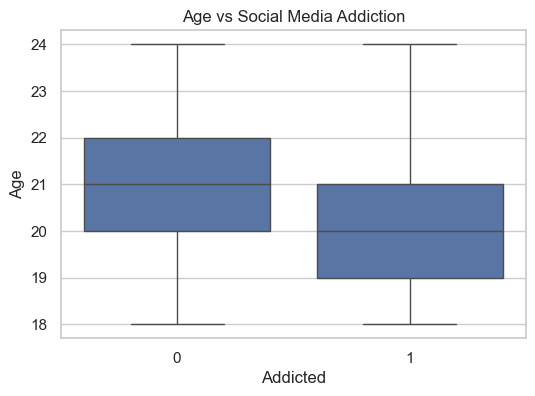

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Addicted', y='Age', data=df)
plt.xlabel("Addicted")
plt.ylabel("Age")
plt.title("Age vs Social Media Addiction")
plt.show()

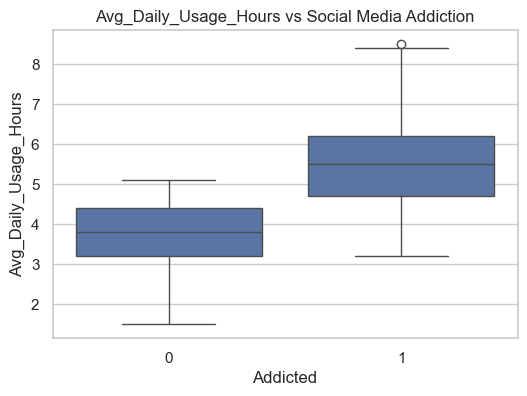

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Addicted', y='Avg_Daily_Usage_Hours', data=df)
plt.xlabel("Addicted")
plt.ylabel("Avg_Daily_Usage_Hours")
plt.title("Avg_Daily_Usage_Hours vs Social Media Addiction")
plt.show()

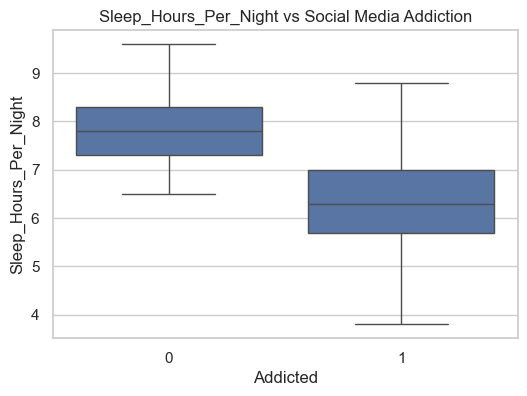

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Addicted', y='Sleep_Hours_Per_Night', data=df)
plt.xlabel("Addicted")
plt.ylabel("Sleep_Hours_Per_Night")
plt.title("Sleep_Hours_Per_Night vs Social Media Addiction")
plt.show()

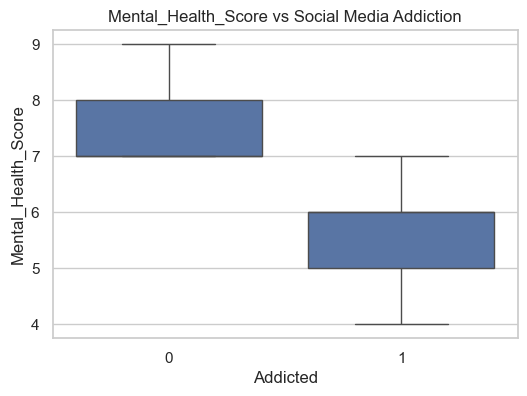

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Addicted', y='Mental_Health_Score', data=df)
plt.xlabel("Addicted")
plt.ylabel("Mental_Health_Score")
plt.title("Mental_Health_Score vs Social Media Addiction")
plt.show()

The analysis shows how age varies between addicted and non-addicted individuals.
Individuals classified as addicted generally exhibit higher daily screen time compared to non-addicted individuals.
The analysis suggests that addicted individuals tend to have fewer sleep hours.
Higher anxiety levels are observed among individuals classified as addicted.

### CORRELATION ANALYSIS

In [20]:
numerical_col = [
    "Age",
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Conflicts_Over_Social_Media",
    "Addicted_Score"
]
df_num = df[numerical_col]

In [21]:
corr_mat = df_num.corr()
corr_mat

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
Age,1.000000,-0.113682,0.125265,0.160278,-0.184482,-0.166396
Avg_Daily_Usage_Hours,-0.113682,1.000000,-0.790582,-0.801058,0.804582,0.832000
Sleep_Hours_Per_Night,0.125265,-0.790582,1.000000,0.707439,-0.677266,-0.764858
Mental_Health_Score,0.160278,-0.801058,0.707439,1.000000,-0.893572,-0.945051
Conflicts_Over_Social_Media,-0.184482,0.804582,-0.677266,-0.893572,1.000000,0.933586
Addicted_Score,-0.166396,0.832000,-0.764858,-0.945051,0.933586,1.000000


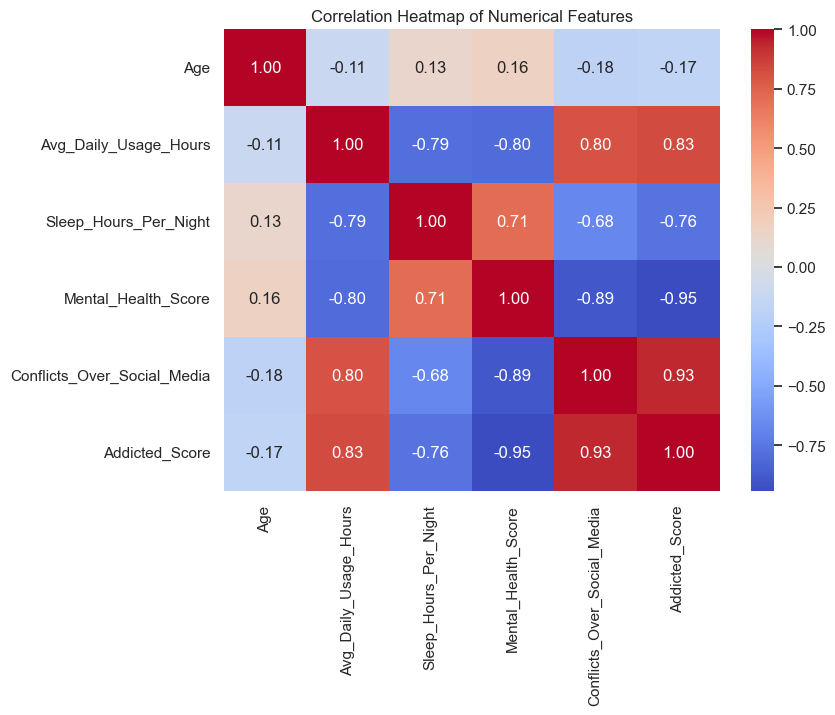

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_mat,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Correlation analysis was performed to understand relationships between numerical variables.
Features such as screen time, sleep hours, and anxiety level show meaningful correlation with addiction status.

#### EDA Insights

Higher screen time is strongly associated with addiction

Reduced sleep duration is common among addicted individuals

Anxiety levels tend to be higher in addicted individuals

No single factor determines addiction; it is influenced by multiple behavioral features

### Data Cleaning & Preprocessing

In [23]:
df.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
Addicted                        0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

#### Data Cleaning & Preprocessing

The dataset was examined for missing values, duplicate records, and inconsistencies.
No missing values or duplicate entries were found, and all variables were already in a suitable format for analysis.
Therefore, no additional data cleaning or preprocessing was required before model development.

### Categorical Encoding Strategy

In [26]:
df.drop(columns=['Student_ID', 'Addicted_Score','Academic_Level'], inplace=True)


In [27]:
df['Gender'] = df['Gender'].map({
    'Male': 0,
    'Female': 1
})


In [28]:
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].map({
    'No': 0,
    'Yes': 1
})


In [29]:
df['Relationship_Status'] = df['Relationship_Status'].map({
    'Single': 0,
    'In Relationship': 1,
    'Complicated': 2
})


In [30]:
df = pd.get_dummies(
    df,
    columns=['Country', 'Most_Used_Platform'],
    drop_first=True
)


In [31]:
df.head()

,Age,Gender,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted,Country_Albania,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
0,19,1,5.2,1,6.5,6,1,3,1,False,...,False,False,False,False,False,False,False,False,False,False
1,22,0,2.1,0,7.5,8,0,0,0,False,...,False,False,False,False,False,True,False,False,False,False
2,20,1,6.0,1,5.0,5,2,4,1,False,...,False,False,False,False,True,False,False,False,False,False
3,18,0,3.0,0,7.0,7,0,1,0,False,...,False,False,False,False,False,False,False,False,False,True
4,21,0,4.5,1,6.0,6,1,2,1,False,...,False,False,False,False,False,False,False,False,False,False


Categorical variables cannot be directly processed by machine learning algorithms.
Therefore, categorical features such as gender, country, academic level, and most-used platform were converted into numerical form using encoding techniques.
This transformation enables the model to understand and learn from categorical data effectively.

### Feature Scaling

In [32]:
x = df.drop(columns=["Addicted"])
y = df["Addicted"]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Feature scaling was applied only after converting all categorical variables into numerical form.
This ensures that the standardization process operates correctly on numerical data.

## Model Building (LogisticRegression)

In [35]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train_scaled,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [36]:
y_pred = lg.predict(x_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9943502824858758


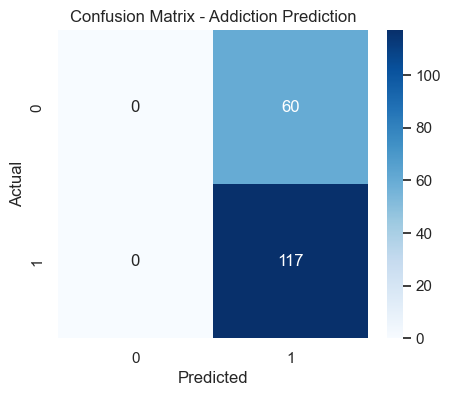

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Addiction Prediction")
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.99      1.00       117

    accuracy                           0.99       177
   macro avg       0.99      1.00      0.99       177
weighted avg       0.99      0.99      0.99       177



The Logistic Regression model achieved an accuracy of 99% on the test dataset.
The model demonstrated excellent precision and recall for both addicted and non-addicted classes, indicating strong classification capability.
High F1-scores further confirm the model’s balanced and reliable performance in identifying social media addiction.

In [40]:
df.corr()["Addicted"].sort_values(ascending=False)

Addicted                        1.000000
Affects_Academic_Performance    0.951083
Conflicts_Over_Social_Media     0.802294
Avg_Daily_Usage_Hours           0.653111
Most_Used_Platform_TikTok       0.302274
                                  ...   
Country_France                 -0.249994
Country_Denmark                -0.281318
Country_Switzerland            -0.281318
Sleep_Hours_Per_Night          -0.612959
Mental_Health_Score            -0.787843
Name: Addicted, Length: 129, dtype: float64

### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(x_train_scaled,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [42]:
y_pred_rf = rf.predict(x_test_scaled)


In [43]:
from sklearn.metrics import accuracy_score, classification_report

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9943502824858758
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.99      1.00       117

    accuracy                           0.99       177
   macro avg       0.99      1.00      0.99       177
weighted avg       0.99      0.99      0.99       177



#### Model Comparison

In addition to Logistic Regression, a Random Forest classifier was trained to capture complex, non-linear relationships in the data.
The Random Forest model achieved strong performance comparable to the baseline model.

In [59]:
df.corr()["Addicted"].sort_values(ascending=False)

Addicted                        1.000000
Affects_Academic_Performance    0.951083
Conflicts_Over_Social_Media     0.802294
Avg_Daily_Usage_Hours           0.653111
Most_Used_Platform_TikTok       0.302274
                                  ...   
Country_France                 -0.249994
Country_Denmark                -0.281318
Country_Switzerland            -0.281318
Sleep_Hours_Per_Night          -0.612959
Mental_Health_Score            -0.787843
Name: Addicted, Length: 129, dtype: float64

## Robustness Check on Highly Correlated Feature

Correlation analysis revealed that `Affects_Academic_Performance` had a strong correlation (0.95) with the target variable.

To ensure that the model was not overly dependent on this feature, a robustness experiment was conducted by removing this variable and retraining the model.

The classification performance remained approximately the same (~99% accuracy), indicating that addiction prediction is supported by multiple behavioral indicators rather than a single dominant feature.


### Feature Importance Analysis

In [44]:
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)

,Feature,Importance
7,Conflicts_Over_Social_Media,0.236464
3,Affects_Academic_Performance,0.229006
5,Mental_Health_Score,0.165033
4,Sleep_Hours_Per_Night,0.090098
2,Avg_Daily_Usage_Hours,0.080198
46,Country_India,0.027748
33,Country_Denmark,0.014737
38,Country_France,0.013481
100,Country_Switzerland,0.013388
49,Country_Ireland,0.012030


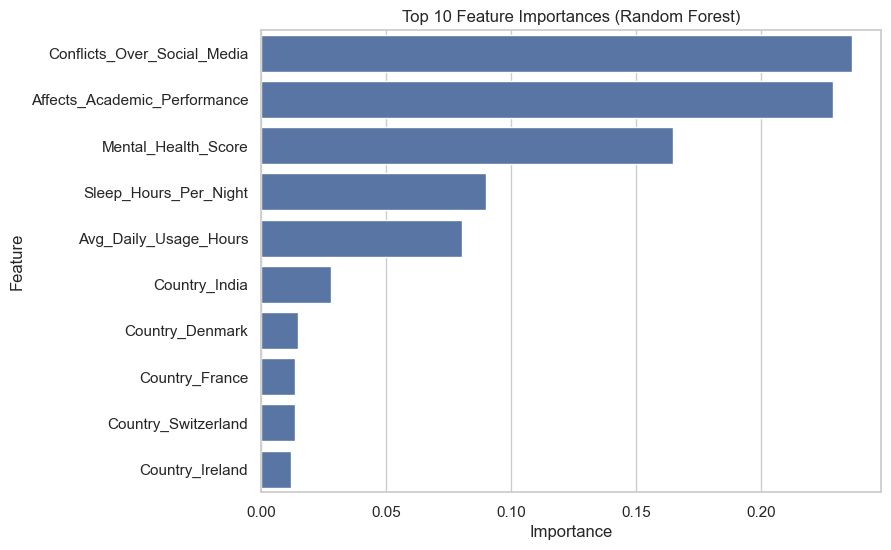

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


#### Feature Importance Analysis

Feature importance analysis was conducted using the Random Forest model to identify the most influential factors contributing to social media addiction.
The analysis revealed that screen time, sleep duration, and mental health indicators were among the most significant predictors.

## Limitations

- The dataset is survey-based and may contain self-report bias.
- The data shows strong correlations, which may make the classification task easier than real-world scenarios.
- External environmental and psychological factors were not included.
- Model performance may vary on unseen real-world data.


## Conclusion

In this project, a machine learning–based classification system was developed to predict social media addiction using behavioral, lifestyle, and mental health–related features.
Categorical variables were encoded and numerical features were scaled to prepare the dataset for modeling.

Logistic Regression was used as a baseline model and achieved high classification accuracy, demonstrating that the selected features are strong indicators of social media addiction.
To further enhance the analysis, a Random Forest classifier was implemented, which also delivered strong performance and provided valuable insights through feature importance analysis.

The feature importance results revealed that daily screen time, sleep duration, mental health score, and conflicts related to social media usage are among the most influential factors contributing to addiction.
Overall, the models effectively distinguish between addicted and non-addicted individuals, highlighting the potential of machine learning in identifying unhealthy social media usage patterns.

This project demonstrates a complete and structured machine learning workflow, from data preprocessing and feature engineering to model training, evaluation, and interpretation, making it suitable for real-world applications and portfolio presentation.